In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
deliveries = pd.read_csv("deliveries.csv")
ipl_data = pd.read_csv("IPL_Data.csv")
matches = pd.read_csv("matches.csv")
sns.set(style="darkgrid")

<ipython-input-10-be3b13b80935>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.index, y=top_players.values, palette="magma")


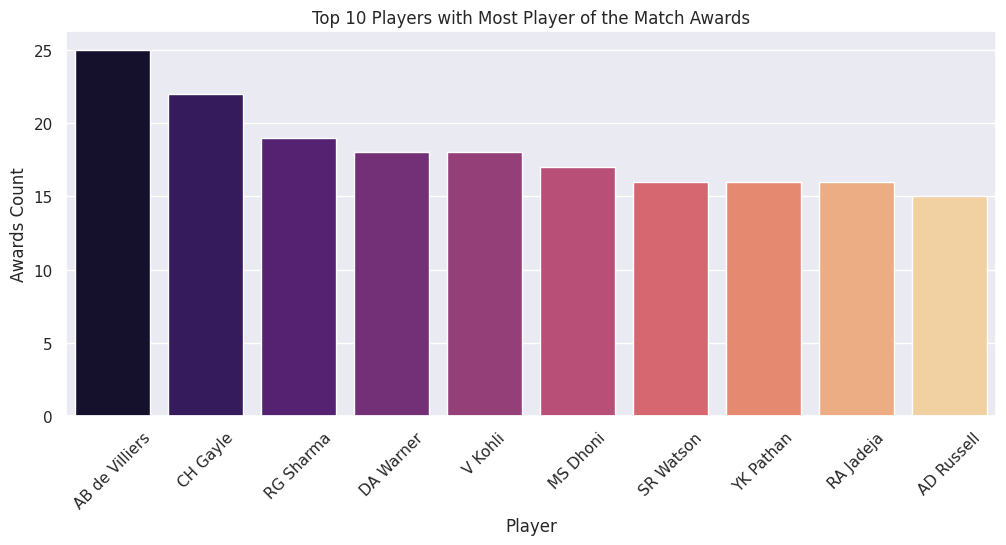

In [10]:
# 1. Most Player of the Match Awards
plt.figure(figsize=(12,5))
top_players = matches['player_of_match'].value_counts().head(10)
sns.barplot(x=top_players.index, y=top_players.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Players with Most Player of the Match Awards")
plt.xlabel("Player")
plt.ylabel("Awards Count")
plt.show()

<ipython-input-11-a425067f5088>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_strike_rate.index, y=avg_strike_rate.values, palette="coolwarm")


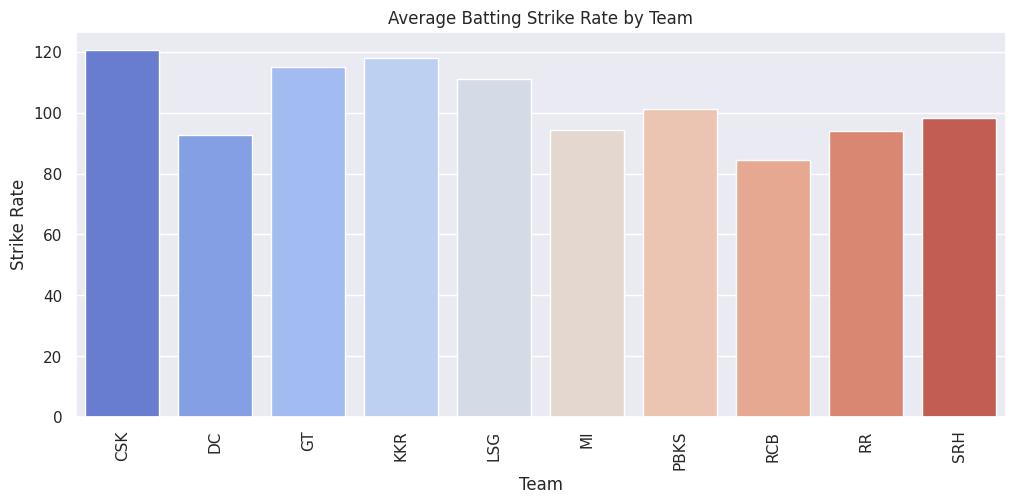

In [11]:
# 2. Average Batting Strike Rate by Team
ipl_data.columns = ipl_data.columns.str.strip()
ipl_data['BattingS/R'] = pd.to_numeric(ipl_data['BattingS/R'], errors='coerce')
avg_strike_rate = ipl_data.groupby('Team')['BattingS/R'].mean().dropna()
plt.figure(figsize=(12,5))
sns.barplot(x=avg_strike_rate.index, y=avg_strike_rate.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Batting Strike Rate by Team")
plt.xlabel("Team")
plt.ylabel("Strike Rate")
plt.show()

<ipython-input-12-f6b9532b3616>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers['Name'], y=top_bowlers['EconomyRate'], palette="viridis")


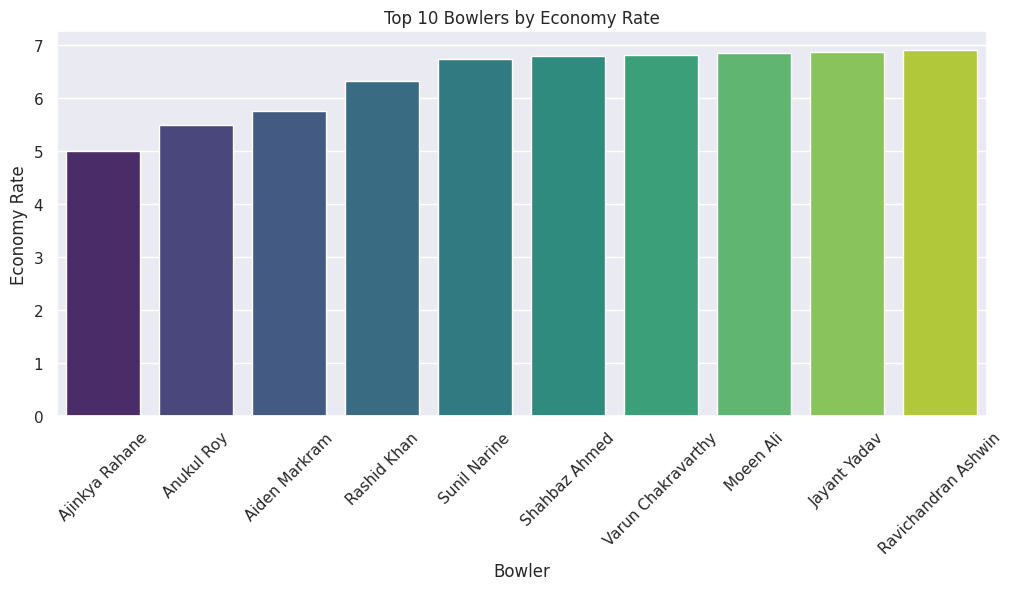

In [12]:
# 3. Top Bowlers by Economy Rate
ipl_data['EconomyRate'] = pd.to_numeric(ipl_data['EconomyRate'], errors='coerce')
top_bowlers = ipl_data[['Name', 'EconomyRate']].dropna().nsmallest(10, 'EconomyRate')
plt.figure(figsize=(12,5))
sns.barplot(x=top_bowlers['Name'], y=top_bowlers['EconomyRate'], palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Bowlers by Economy Rate")
plt.xlabel("Bowler")
plt.ylabel("Economy Rate")
plt.show()

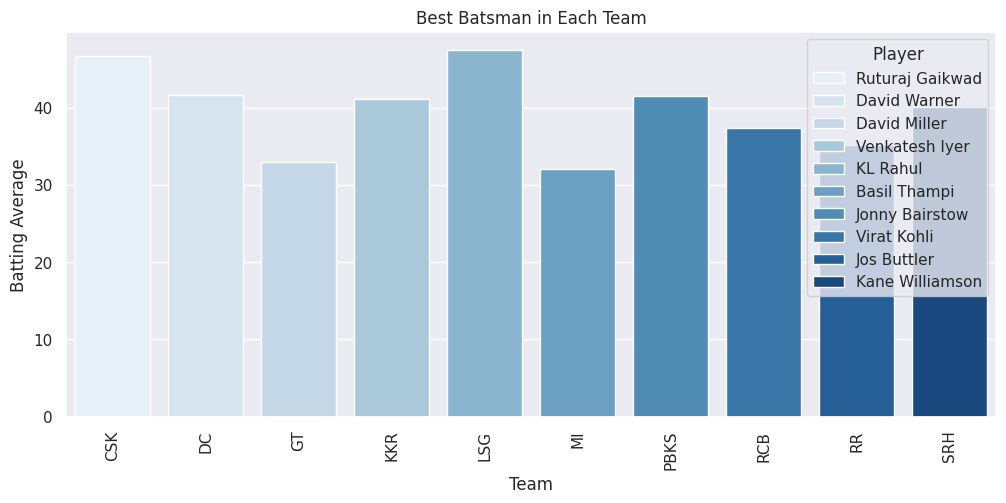

In [20]:
# 4. Best Batsman in Each Team
if 'BattingAVG' not in ipl_data.columns:
    print("Column 'BattingAVG' not found. Checking for alternatives...")
    print(ipl_data.columns)
else:
    best_batsmen = ipl_data.loc[ipl_data.groupby('Team')['BattingAVG'].idxmax().dropna()]
    plt.figure(figsize=(12,5))
    sns.barplot(x=best_batsmen['Team'], y=best_batsmen['BattingAVG'], hue=best_batsmen['Name'], palette="Blues")
    plt.xticks(rotation=90)
    plt.title("Best Batsman in Each Team")
    plt.xlabel("Team")
    plt.ylabel("Batting Average")
    plt.legend(title="Player")
    plt.show()

<ipython-input-14-40a140ecdaca>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_bowlers = ipl_data.groupby('Team').apply(lambda x: x.nsmallest(1, 'EconomyRate')).reset_index(drop=True)


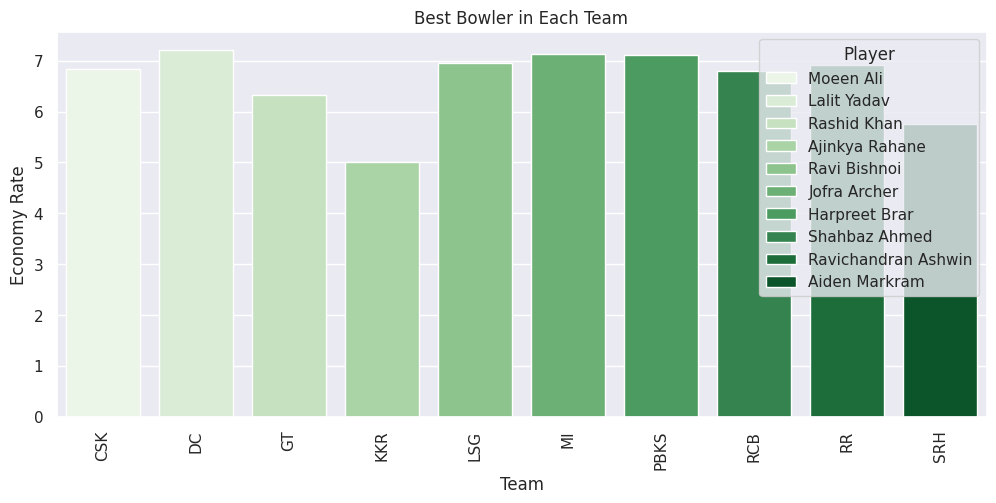

In [14]:
# 5. Best Bowler in Each Team
best_bowlers = ipl_data.groupby('Team').apply(lambda x: x.nsmallest(1, 'EconomyRate')).reset_index(drop=True)
plt.figure(figsize=(12,5))
sns.barplot(x=best_bowlers['Team'], y=best_bowlers['EconomyRate'], hue=best_bowlers['Name'], palette="Greens")
plt.xticks(rotation=90)
plt.title("Best Bowler in Each Team")
plt.xlabel("Team")
plt.ylabel("Economy Rate")
plt.legend(title="Player")
plt.show()